# Principal Component Analysis - Wine Quality Dataset
## Data Loading

For this Project, I loaded the [Wine Quality Dataset](https://archive.ics.uci.edu/ml/datasets/Wine+Quality) from the UCI Machine Learning Repository. This dataset includes various chemical properties of wine and a quality rating. Loading the data allows me to explore and process it for further analysis.

 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('winequality-red.csv', delimiter=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Checking Missing Values
I checked for missing values to ensure that all rows in the dataset are complete. Missing data can distort the analysis or require imputation, so confirming its absence maintains the accuracy of the results.

In [2]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Standardizing the Data

In [3]:
# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop(columns=['quality']))

I standardized the data to ensure that all features contribute equally to the analysis. Standardization rescales each feature to have a mean of 0 and a standard deviation of 1, making the analysis less biased toward features with larger values. This step is crucial because PCA relies on variance, and without scaling, features with larger magnitudes would dominate the principal components.

## Calculating the Covariance Matrix

In [4]:
# Calculate the covariance matrix
covariance_matrix = np.cov(scaled_data, rowvar=False)
covariance_matrix

array([[ 1.00062578, -0.25629118,  0.67212377,  0.11484855,  0.09376383,
        -0.15389043, -0.11325227,  0.66846534, -0.68340559,  0.18312019,
        -0.06170686],
       [-0.25629118,  1.00062578, -0.55284143,  0.00191908,  0.06133613,
        -0.0105104 ,  0.07651786,  0.02204002,  0.23508431, -0.26115001,
        -0.20241462],
       [ 0.67212377, -0.55284143,  1.00062578,  0.14366701,  0.20395046,
        -0.06101629,  0.03555526,  0.36517555, -0.54224326,  0.31296577,
         0.10997202],
       [ 0.11484855,  0.00191908,  0.14366701,  1.00062578,  0.05564433,
         0.18716605,  0.20315493,  0.3555057 , -0.08570602,  0.00553058,
         0.04210177],
       [ 0.09376383,  0.06133613,  0.20395046,  0.05564433,  1.00062578,
         0.00556563,  0.04743013,  0.20075788, -0.26519198,  0.37149281,
        -0.22127893],
       [-0.15389043, -0.0105104 , -0.06101629,  0.18716605,  0.00556563,
         1.00062578,  0.66808426, -0.02195956,  0.07042154,  0.0516899 ,
        -0.069

The covariance matrix captures the variance relationships between features. In PCA, this matrix helps identify directions (principal components) along which the data varies the most. By examining covariance, we can find patterns and reduce dimensionality while retaining significant variance.

## Calculating Eigenvalues and Eigenvectors

In [5]:
# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

Eigenvalues represent the amount of variance along each principal component, while eigenvectors give the direction of these components. Calculating these values lets me determine the key components that capture the most variance in the data, which is central to PCA.



## Sorting Eigenvalues and Eigenvectors

In [6]:
# Sort eigenvalues and eigenvectors in descending order of eigenvalues
sorted_eigenvalues, sorted_eigenvectors = zip(*sorted(zip(eigenvalues, eigenvectors.T), reverse=True))
sorted_eigenvalues = np.array(sorted_eigenvalues)
sorted_eigenvectors = np.array(sorted_eigenvectors).T

Sorting the eigenvalues in descending order allows me to prioritize the components that capture the most variance. This helps in selecting the top principal components needed to reduce the dimensionality effectively.

## Selecting Top k Eigenvectors

In [7]:
# Calculate the explained variance ratio for each component
explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)
explained_variance_accumulated = 0
k = 0
for variance in explained_variance_ratio:
    explained_variance_accumulated += variance
    k += 1
    if explained_variance_accumulated >= 0.90:
        break

print(f"Number of components to explain 90% of variance: {k}")
print("\nVariance explained by each principal component:")
for i in range(k):
    print(f"Principal Component {i+1}: {explained_variance_ratio[i] * 100:.2f}% of variance")

Number of components to explain 90% of variance: 7

Variance explained by each principal component:
Principal Component 1: 28.17% of variance
Principal Component 2: 17.51% of variance
Principal Component 3: 14.10% of variance
Principal Component 4: 11.03% of variance
Principal Component 5: 8.72% of variance
Principal Component 6: 6.00% of variance
Principal Component 7: 5.31% of variance


In [8]:
# Select the top k eigenvectors
selected_eigenvectors = sorted_eigenvectors[:, :k]

# Project the data onto the selected principal components
pca_data = np.dot(scaled_data, selected_eigenvectors)

I chose the top 2 principal components as they capture the most variance in the dataset. Reducing the data to two dimensions is beneficial for visualization, enabling a clearer understanding of the relationships between samples while preserving the majority of the variance.

## Projecting Data onto New Dimensions

In [9]:
# Transform the data using the top k eigenvectors
pca_data = np.dot(scaled_data, selected_eigenvectors)

I selected the top 7 principal components because they collectively capture at least 90% of the variance in the dataset. Reducing the data to these 7 dimensions preserves most of the dataset's variance, ensuring that we retain the essential patterns and relationships within the data. Although visualizing all 7 dimensions is challenging, focusing on the first two components still provides valuable insights into the primary variance and clustering trends in the dataset.

## Creating a DataFrame for PCA Results

In [10]:
# Convert the PCA results to a DataFrame for easier plotting
pca_df = pd.DataFrame(pca_data, columns=[f'Principal Component {i+1}' for i in range(k)])
pca_df['Quality'] = df['quality']

Converting the PCA results into a DataFrame with labels for the top 7 principal components allows for organized analysis and potential plotting. Adding the 'Quality' column enables color-coding by quality, aiding in the interpretation of clustering and patterns in wine quality based on the principal components.

## Plotting the PCA Representation

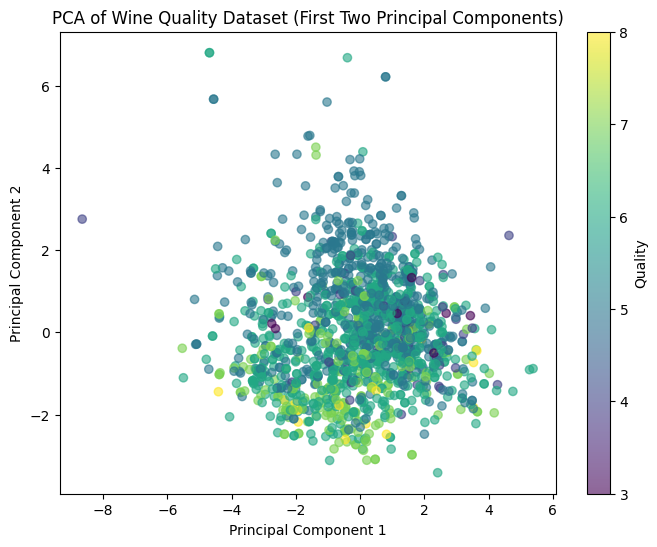

In [11]:
# Plot the PCA representation using the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df['quality'], cmap='viridis', alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Quality')
plt.title('PCA of Wine Quality Dataset (First Two Principal Components)')
plt.show()

This plot visualizes the wine dataset using the first two principal components, with color-coding based on wine quality. By focusing on these two components, we capture the primary variance in the data, allowing us to observe clustering patterns that may correspond to different quality levels in the wine samples.

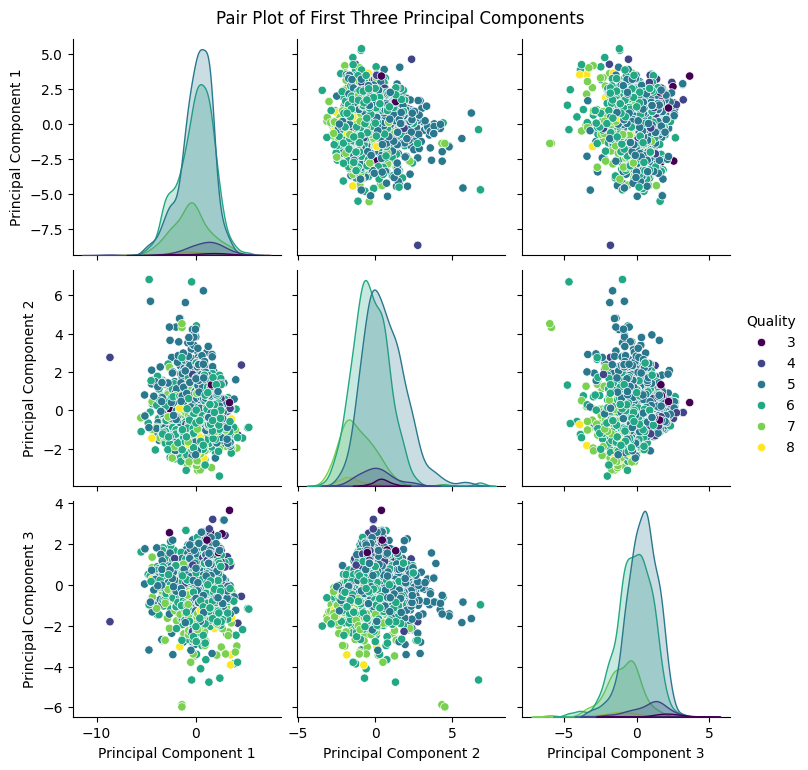

In [12]:
# Plot pair plot of the first few components for a more comprehensive view
sns.pairplot(pca_df, vars=[f'Principal Component {i+1}' for i in range(3)], hue='Quality', palette='viridis')
plt.suptitle("Pair Plot of First Three Principal Components", y=1.02)
plt.show()

This pair plot visualizes the wine samples based on their first three principal components, with colors representing wine quality. By examining the relationships between each pair of components, we can observe how the wines cluster based on their chemical properties. The color-coding by quality highlights potential patterns, allowing us to see how certain quality levels group within this reduced-dimensional space. This multi-dimensional view provides a more comprehensive perspective on the structure of the dataset than a two-component plot alone.

## Conclusion
In this Project, I applied Principal Component Analysis (PCA) to the Wine Quality Dataset to reduce its dimensionality and explore the data in terms of its principal components. By standardizing the features, calculating the covariance matrix, and selecting the optimal number of components based on cumulative explained variance, I transformed the data into a lower-dimensional space. Using the top seven principal components, which together capture 90% of the variance, I created visualizations to examine clustering patterns based on wine quality. This dimensionality reduction highlights key patterns in the data, potentially aiding in the differentiation of wine quality levels based on chemical properties. This approach demonstrates how PCA can reveal underlying structures in high-dimensional data, making it a powerful tool for both exploratory analysis and feature reduction.